In [175]:
%matplotlib inline

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import re

from sklearn import metrics
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [176]:
df = pd.read_csv("TSLA.csv")

In [177]:
df['Date'] = pd.to_datetime(df['Date'])

In [178]:
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

In [240]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Day,Month,Year,New
0,2020-10-26,411.630005,425.760010,410.000000,420.279999,420.279999,28239200,26,10,2020,175255.595045
1,2020-10-27,423.760010,430.500000,420.100006,424.679993,424.679993,22686500,27,10,2020,182428.684305
2,2020-10-28,416.480011,418.600006,406.000000,406.019989,406.019989,25451400,28,10,2020,174338.535103
3,2020-10-29,409.959991,418.059998,406.459991,410.829987,410.829987,22655300,29,10,2020,171387.873018
4,2020-10-30,406.899994,407.589996,379.109985,388.040009,388.040009,42511300,30,10,2020,165848.366927


<AxesSubplot:xlabel='Date', ylabel='Close'>

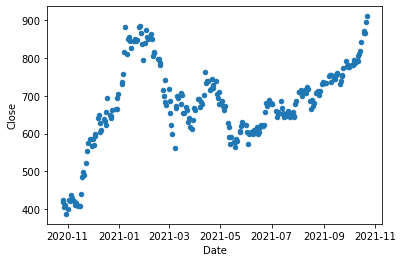

In [180]:
df.plot.scatter(x = 'Date', y = 'Close')

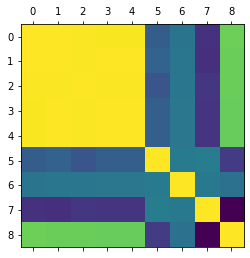

In [181]:
plt.matshow(df.corr())
plt.show()

In [182]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Open,High,Low,Close,Adj Close,Volume,Day,Month,Year
Open,1.000000,0.994047,0.992480,0.985093,0.985093,-0.182454,-0.028960,-0.436782,0.629033
High,0.994047,1.000000,0.991162,0.994196,0.994196,-0.143814,-0.017643,-0.446443,0.623907
Low,0.992480,0.991162,1.000000,0.992266,0.992266,-0.231946,-0.018813,-0.406617,0.626959
Close,0.985093,0.994196,0.992266,1.000000,1.000000,-0.163889,-0.010717,-0.416370,0.613595
Adj Close,0.985093,0.994196,0.992266,1.000000,1.000000,-0.163889,-0.010717,-0.416370,0.613595
Volume,-0.182454,-0.143814,-0.231946,-0.163889,-0.163889,1.000000,0.018526,0.032567,-0.381225
Day,-0.028960,-0.017643,-0.018813,-0.010717,-0.010717,0.018526,1.000000,0.005377,-0.046810
Month,-0.436782,-0.446443,-0.406617,-0.416370,-0.416370,0.032567,0.005377,1.000000,-0.673121
Year,0.629033,0.623907,0.626959,0.613595,0.613595,-0.381225,-0.046810,-0.673121,1.000000


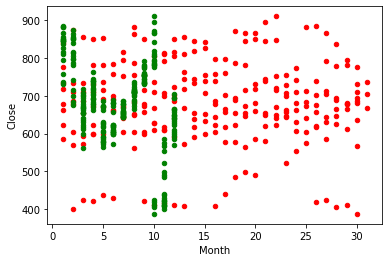

In [183]:
ax1 = df.plot(kind='scatter', x='Day', y='Close', color='r')
ax2 = df.plot(kind='scatter', x='Month', y='Close', color='g', ax=ax1)

In [184]:
X = df[['Day', 'Month', 'Year', 'Open']]
y = df['Close']

In [185]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [186]:
X_train.shape

(168, 4)

In [187]:
X_test.shape

(83, 4)

In [188]:
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)
Y_pred = linear_regressor.predict(X_train)

In [189]:
print(X_train)

     Day  Month  Year        Open
201   13      8  2021  723.710022
152    4      6  2021  579.710022
246   18     10  2021  851.789978
65    29      1  2021  830.000000
136   12      5  2021  602.489990
..   ...    ...   ...         ...
106   30      3  2021  601.750000
14    13     11  2020  410.850006
92    10      3  2021  700.299988
179   14      7  2021  670.750000
102   24      3  2021  667.909973

[168 rows x 4 columns]


In [190]:
Y_pred.shape

(168,)

In [191]:
dframe = pd.DataFrame(y_train, Y_pred)

In [192]:
linear_regressor.score(X_test, y_test)

0.9732101708336776

In [193]:
#Jeg finner ikke ut hvordan jeg kan sette X_train og y_train på en graf siden X_train består av flere verdier
print("MSE = "+str(metrics.mean_squared_error(y_train, Y_pred)))

MSE = 361.25133416971374


In [194]:
Y_pred = linear_regressor.predict(X_test)

In [195]:
dfr = pd.DataFrame({'Actual Price':y_test, 'Predicted Price': Y_pred})
print(dfr)

     Actual Price  Predicted Price
155    598.780029       601.914750
6      423.899994       410.545622
164    623.710022       621.675949
60     846.640015       832.993282
113    677.020020       675.718776
..            ...              ...
127    677.000000       703.150117
142    586.780029       577.695212
147    630.849976       624.575844
5      400.510010       394.667754
56     826.159973       848.455114

[83 rows x 2 columns]


In [196]:
print("MSE = "+str(metrics.mean_squared_error(y_test, Y_pred)))

MSE = 316.50557214440704


In [201]:
df['New'] = df['Open']*df['High']

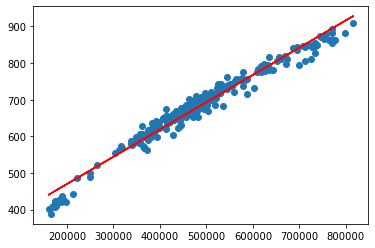

MSE = 381.89404525046956


In [241]:
X = pd.DataFrame(df['New'])
Y = pd.DataFrame(df['Close'])


linear_regressor.fit(X,Y)
Y_pred = linear_regressor.predict(X)
plt.scatter(X,Y)
plt.plot(X,Y_pred, color='red')
plt.show()
print("MSE = "+str(metrics.mean_squared_error(Y, Y_pred)))

In [257]:
print('Predict stock value for a specific Date')
day = input('Put day: ')
month = input('Put month: ')
year = input('Put year: ')

day = int(day)
month = int(month)
year = int(year)

Stock_value = linear_regressor.predict([[day*month*year]])

print('Stock value for ' + str(day) + "-" + str(month) + "-" + str(year) + " is " + str(Stock_value))

date_chosen = str(year) + "-" + str(month) + "-" + str(day)
date_chosen = pd.to_datetime(date_chosen)
Close_chosen = df.loc[df['Date'] == date_chosen]
Close_value = Close_chosen['Close']
err = metrics.mean_squared_error(Close_value, Stock_value)
print('MSE = ' + str(err))

Predict stock value for a specific Date
Put day: 2
Put month: 3
Put year: 2021
Stock value for 2-3-2021 is [[329.72437912]]
MSE = 127246.03560578244
